In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import statsmodels.formula.api as sm

def loadData():
    train = pd.read_csv("kc_house_train_data.csv")
    test = pd.read_csv("kc_house_test_data.csv")
    return [train, test]

def normalizeData(data):
    data  = (data - data.mean())/data.std()
    return data

def load_testData():
    [train, test] = loadData()
    test_IDs = test['id']
    test_actual_price = np.array(test['price'])
    test = test.drop(['id', 'price'], axis = 1)
    i = 0
    conv_dates = []
    for value in test['date']:
        year = int(value[:4])
        month = int(value[4:6])
        day = int(value[6:8])
        conv_dates.insert(i, year*365 + month*30 + day) 
        i = i+1
    min_date = min(conv_dates)
    conv_dates = [date-min_date for date in conv_dates]
    test['date'] = conv_dates
    test = normalizeData(test)
    test_actual_price = (test_actual_price-np.mean(test_actual_price))/np.std(test_actual_price)
    return [test, test_actual_price]

def load_trainData():
    [train, test] = loadData()
    train_IDs = train['id']
    train_actual_price = np.array(train['price'])    
    train = train.drop(['id', 'price'], axis = 1)    
    i = 0
    conv_dates = []
    for value in train['date']:
        year = int(value[:4])
        month = int(value[4:6])
        day = int(value[6:8])
        conv_dates.insert(i, year*365 + month*30 + day) 
        i = i+1
    min_date = min(conv_dates)
    conv_dates = [date-min_date for date in conv_dates]
    train['date'] = conv_dates
    train = normalizeData(train)    
    train_actual_price = (train_actual_price-np.mean(train_actual_price))/np.std(train_actual_price)    
    return [train, train_actual_price]

def compute_cost(actual_price, predicted_price):
    sq_loss = (actual_price - predicted_price)**2
    cost = np.sum(sq_loss)
    return cost/(actual_price.shape[0])

def backStep(X, y):
    regressor_OLS = sm.OLS(endog = y, exog = X).fit()
    p_values = np.round(regressor_OLS.pvalues, 5)
    to_drop = np.argmax(p_values[1:])+1
    print(regressor_OLS.params)
    print("\n",p_values)
    print("drop: %d"%to_drop)
    return regressor_OLS.params

[train ,Y_train] = load_trainData()
X_train = np.array(train)
X_train = np.append (arr = np.ones([X_train.shape[0],1]).astype(int), values = X_train, axis = 1)


In [41]:
itr1 = backStep(X_train, Y_train)

[  4.14605850e-13   3.60272985e-02  -9.82838467e-02   8.77189791e-02
   2.24565971e-01   1.74701457e-02   7.46968620e-03   1.42824892e-01
   1.02838439e-01   4.67793408e-02   3.14511380e-01   2.08559081e-01
   7.75558379e-02  -2.13020292e-01   2.24571667e-02  -8.75625162e-02
   2.27307356e-01  -8.14467873e-02   3.77315837e-02  -2.86973184e-02]

 [ 1.       0.       0.       0.       0.       0.00398  0.2022   0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.     ]
drop: 6


In [42]:
X_train = np.delete(X_train, 6, 1)
itr2 = backStep(X_train, Y_train).tolist()
itr2.insert(6,0)
itr2 = np.array(itr2)

[  4.17535798e-13   3.59869046e-02  -9.84836274e-02   9.02540140e-02
   2.24846732e-01   1.73579715e-02   1.42852710e-01   1.02972568e-01
   4.64725091e-02   3.15330181e-01   2.10172475e-01   7.51353118e-02
  -2.11201799e-01   2.27209877e-02  -8.68911848e-02   2.27795431e-01
  -8.20478614e-02   3.67485230e-02  -2.89555583e-02]

 [ 1.       0.       0.       0.       0.       0.00422  0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.       0.
  0.     ]
drop: 5


In [43]:
print(itr2)

[  4.17535798e-13   3.59869046e-02  -9.84836274e-02   9.02540140e-02
   2.24846732e-01   1.73579715e-02   0.00000000e+00   1.42852710e-01
   1.02972568e-01   4.64725091e-02   3.15330181e-01   2.10172475e-01
   7.51353118e-02  -2.11201799e-01   2.27209877e-02  -8.68911848e-02
   2.27795431e-01  -8.20478614e-02   3.67485230e-02  -2.89555583e-02]


In [44]:
X_train = np.delete(X_train, 5, 1)
itr3 = backStep(X_train, Y_train).tolist()
itr3.insert(5,0)
itr3.insert(6,0)
itr3 = np.array(itr3)

[  4.12800003e-13   3.60488630e-02  -9.88810124e-02   9.02957750e-02
   2.25600491e-01   1.42584547e-01   1.03409572e-01   4.61935164e-02
   3.15589232e-01   2.10949997e-01   7.52514070e-02  -2.12080941e-01
   2.25281518e-02  -8.69525394e-02   2.27386200e-01  -8.10782372e-02
   3.56787833e-02  -1.66828082e-02]

 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.30000000e-04]
drop: 17


In [45]:
print(itr3)

[  4.12800003e-13   3.60488630e-02  -9.88810124e-02   9.02957750e-02
   2.25600491e-01   0.00000000e+00   0.00000000e+00   1.42584547e-01
   1.03409572e-01   4.61935164e-02   3.15589232e-01   2.10949997e-01
   7.52514070e-02  -2.12080941e-01   2.25281518e-02  -8.69525394e-02
   2.27386200e-01  -8.10782372e-02   3.56787833e-02  -1.66828082e-02]


In [46]:
itr1-itr3

array([  1.80584714e-15,  -2.15644713e-05,   5.97165664e-04,
        -2.57679587e-03,  -1.03452073e-03,   1.74701457e-02,
         7.46968620e-03,   2.40345565e-04,  -5.71132249e-04,
         5.85824490e-04,  -1.07785200e-03,  -2.39091610e-03,
         2.30443087e-03,  -9.39350469e-04,  -7.09851202e-05,
        -6.09976859e-04,  -7.88438921e-05,  -3.68550098e-04,
         2.05280050e-03,  -1.20145102e-02])

In [47]:
np.sort(itr1-itr3)

array([ -1.20145102e-02,  -2.57679587e-03,  -2.39091610e-03,
        -1.07785200e-03,  -1.03452073e-03,  -9.39350469e-04,
        -6.09976859e-04,  -5.71132249e-04,  -3.68550098e-04,
        -7.88438921e-05,  -7.09851202e-05,  -2.15644713e-05,
         1.80584714e-15,   2.40345565e-04,   5.85824490e-04,
         5.97165664e-04,   2.05280050e-03,   2.30443087e-03,
         7.46968620e-03,   1.74701457e-02])

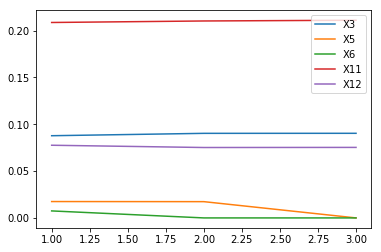

In [48]:
plt.plot([1,2,3], [itr1[3], itr2[3],itr3[3]], label = "X3")
plt.plot([1,2,3], [itr1[5], itr2[5], itr3[5]], label = "X5")
plt.plot([1,2,3], [itr1[6], itr2[6], itr3[6]], label = "X6")
plt.plot([1,2,3], [itr1[11], itr2[11], itr3[11]], label = "X11")
plt.plot([1,2,3], [itr1[12], itr2[12], itr3[12]], label = "X12")
plt.legend()
plt.show()
plt.savefig("Backward Selection Corff profile.png")

In [49]:
weight = np.array(itr3[1:])
bias = itr3[0]
Y_hat_train = np.dot(np.array(train), weight)+bias
print(compute_cost(Y_train, Y_hat_train))

0.29660402845


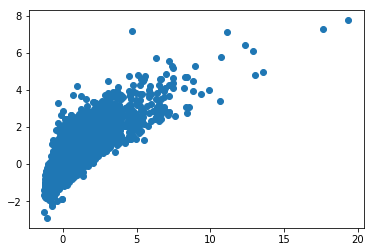

In [50]:
plt.scatter(Y_train, Y_hat_train)
plt.show()
plt.savefig("test vs predict.png")

In [51]:
[test ,Y_test] = load_testData()
X_test = np.array(test)
X_test = np.append (arr = np.ones([X_test.shape[0],1]).astype(int), values = X_test, axis = 1)
Y_hat_test = np.dot(np.array(test), weight)+bias
print(compute_cost(Y_test, Y_hat_test))

0.309356575933
